In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
start='2013-01-01'
end='2023-11-15'

stock='GOOG'

data=yf.download(stock,start,end)

[*********************100%%**********************]  1 of 1 completed


In [3]:
data.reset_index(inplace=True)

In [4]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,17.918339,18.107130,17.846855,18.013729,18.013729,102033017
1,2013-01-03,18.055573,18.229919,17.950716,18.024191,18.024191,93075567
2,2013-01-04,18.165413,18.467529,18.124067,18.380356,18.380356,110954331
3,2013-01-07,18.317591,18.415474,18.196297,18.300158,18.300158,66476239
4,2013-01-08,18.319834,18.338762,18.043119,18.264042,18.264042,67295297
...,...,...,...,...,...,...,...
2732,2023-11-08,132.360001,133.539993,132.160004,133.259995,133.259995,15093600
2733,2023-11-09,133.360001,133.960007,131.509995,131.690002,131.690002,17976500
2734,2023-11-10,131.529999,134.270004,130.869995,134.059998,134.059998,20872900
2735,2023-11-13,133.360001,134.110001,132.770004,133.639999,133.639999,16409900


In [5]:
ma_100_days=data.Close.rolling(100).mean()

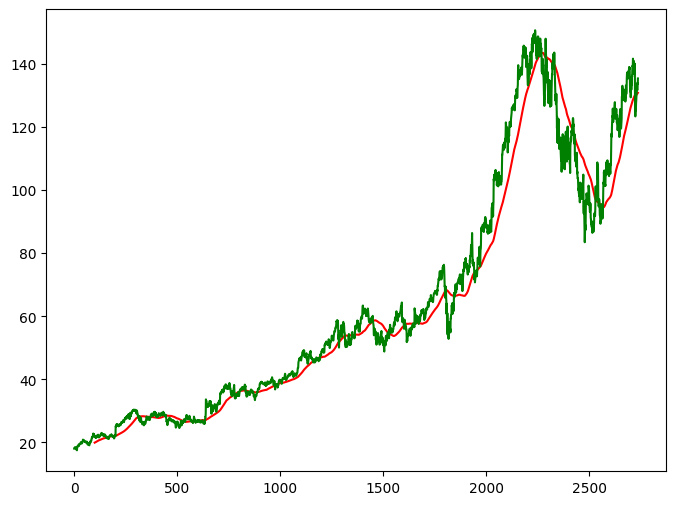

In [6]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days,'r')
plt.plot(data.Close,'g')
plt.show()

In [7]:
ma_200_days=data.Close.rolling(200).mean()

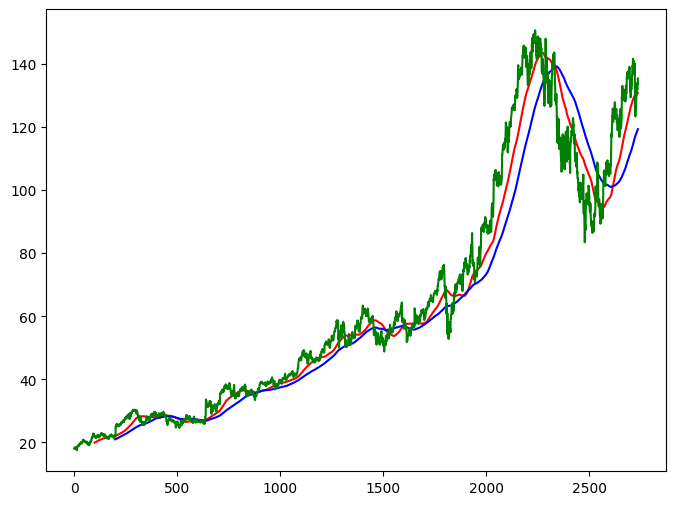

In [8]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days,'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

In [9]:
data.dropna(inplace=True)

In [10]:
data_train=pd.DataFrame(data.Close[0:int(len(data)*0.80)])
data_test=pd.DataFrame(data.Close[int(len(data)*0.80):len(data)])

In [11]:
data_train.shape[0]

2189

In [12]:
data_test.shape[0]

548

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [14]:
data_train_scale=scaler.fit_transform(data_train)

In [15]:
x=[]
y=[]

for i in range(100,data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])

In [16]:
x,y=np.array(x),np.array(y)

In [17]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential


In [18]:
model=Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences=True,
              input_shape=((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [19]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [20]:
model.fit(x,y,epochs=50,batch_size=32,verbose=1)

Epoch 1/50

66/66 [==============================] - 18s 178ms/step - loss: 0.0203
Epoch 2/50
66/66 [==============================] - 13s 199ms/step - loss: 0.0043
Epoch 3/50
66/66 [==============================] - 14s 207ms/step - loss: 0.0038
Epoch 4/50
66/66 [==============================] - 13s 204ms/step - loss: 0.0032
Epoch 5/50
66/66 [==============================] - 19s 282ms/step - loss: 0.0032
Epoch 6/50
66/66 [==============================] - 25s 370ms/step - loss: 0.0035
Epoch 7/50
66/66 [==============================] - 25s 372ms/step - loss: 0.0027
Epoch 8/50
66/66 [==============================] - 25s 374ms/step - loss: 0.0028
Epoch 9/50
66/66 [==============================] - 25s 376ms/step - loss: 0.0025
Epoch 10/50
66/66 [==============================] - 25s 378ms/step - loss: 0.0024
Epoch 11/50
66/66 [==============================] - 25s 377ms/step - loss: 0.0022
Epoch 12/50
66/66 [==============================] - 25s 374ms/step - loss: 0.0021
Epoch 13/50


In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [22]:
pas_100_days=data_train.tail(100)

In [23]:
data_test=pd.concat([pas_100_days,data_test],ignore_index=True)

In [24]:
data_test_scale=scaler.fit_transform(data_test)

In [25]:
x=[]
y=[]

for i in range(100,data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x,y=np.array(x),np.array(y)

In [26]:
y_predict=model.predict(x)

18/18 [==============================] - 2s 69ms/step


In [27]:
scale=1/scaler.scale_

In [28]:
y_predict=y_predict*scale

In [29]:
y=y*scale

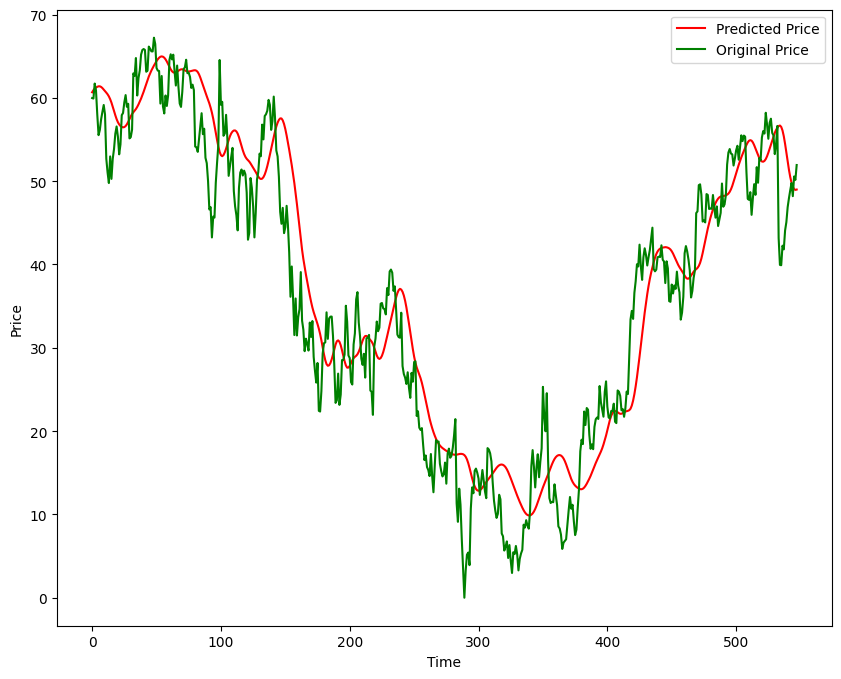

In [30]:
plt.figure(figsize=(10,8))
plt.plot(y_predict,'r',label='Predicted Price')
plt.plot(y,'g',label='Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [31]:
model.save('STOCK.keras')